In [140]:
# attempt to use scikit-learn's PCA algorithm to plot the 7 dimensional data points from output of tone analyzer
from sklearn import decomposition
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd

input_file = 'relationshipproblems100'

[1.00000000e+00 8.60949417e-31]


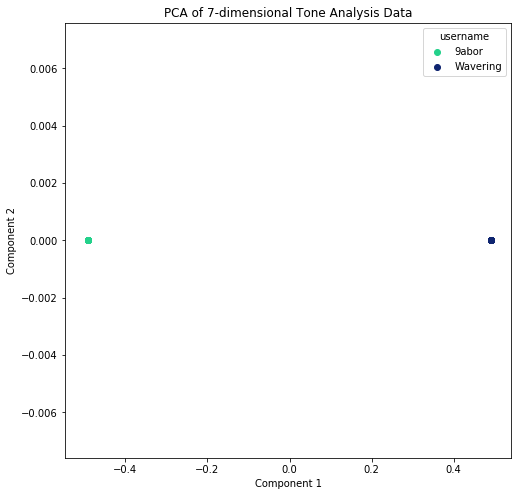

In [141]:
# import data from data/raw/sentiments
input_file_doc = input_file + '_doclevelsentiments'
input_filename = '../../data/raw/sentiments/' + input_file_doc + '.csv'

data = {'username': [], 'tones': []}
with open(input_filename, 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        data['username'].append(row['username'])
        tones = [float(row[x]) for x in ['Anger', 'Fear', 'Joy', 'Sadness', 'Analytical', 'Confident', 'Tentative']]
        data['tones'].append(tones)

x = data['tones']
y = data['username']
pca = decomposition.PCA(n_components=2)
df = pd.concat([pd.DataFrame(pca.fit_transform(x), columns=['component 1', 'component 2']), pd.DataFrame({'username': y})], axis=1)
print(pca.explained_variance_ratio_)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
for name in set(y):
    color = np.random.rand(3)
    plt_x = df['component 1'][df['username'] == name]
    plt_y = df['component 2'][df['username'] == name]
    ax.scatter(plt_x, plt_y, c=color, label=name)
ax.legend(title='username')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA of 7-dimensional Tone Analysis Data')

# plot exported to processed/figures/
output_filepath = '../../data/processed/figures/'
plt.savefig(output_filepath + input_file_doc + '_pca.png')
plt.show()
plt.close()

[0.43215681 0.35669096]


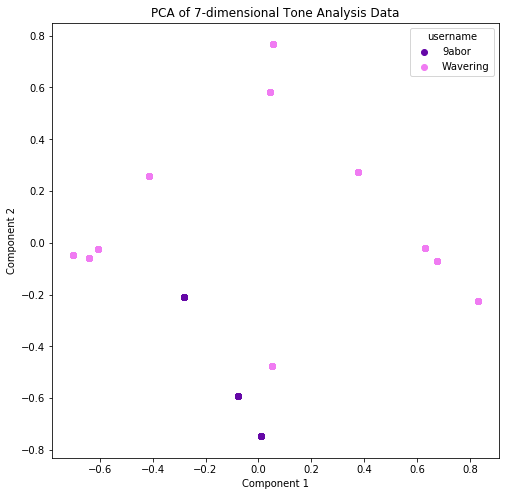

In [142]:
# repeat everything except for sentence level analyses
input_file_sentence = input_file + '_sentencelevelsentiments'
input_filename = '../../data/raw/sentiments/' + input_file_sentence + '.csv'

data = {'username': [], 'tones': []}
with open(input_filename, 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        data['username'].append(row['username'])
        tones = [float(row[x]) for x in ['Anger', 'Fear', 'Joy', 'Sadness', 'Analytical', 'Confident', 'Tentative']]
        data['tones'].append(tones)

x = data['tones']
y = data['username']
pca = decomposition.PCA(n_components=2)
df = pd.concat([pd.DataFrame(pca.fit_transform(x), columns=['component 1', 'component 2']), pd.DataFrame({'username': y})], axis=1)
print(pca.explained_variance_ratio_)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
for name in set(y):
    color = np.random.rand(3)
    x = df['component 1'][df['username'] == name]
    y = df['component 2'][df['username'] == name]
    ax.scatter(x, y, c=color, label=name)
ax.legend(title='username')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA of 7-dimensional Tone Analysis Data')

# plot exported to processed/figures/
output_filepath = '../../data/processed/figures/'
plt.savefig(output_filepath + input_file_sentence + '_pca.png')
plt.show()
plt.close()